In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Object Creation
---

See the [Data Structure Intro section](http://pandas.pydata.org/pandas-docs/stable/dsintro.html#dsintro).

### Create a Series

Create a **Series** by passing a list of values, letting pandas create a default integer index:

In [2]:
s = pd.Series([1, 3, 5, np.nan, 6, 8])

In [3]:
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

### Create a DataFrame

+ From a **numpy array**, with a datetime **index** and labeled **columns**:

In [4]:
dates = pd.date_range('20130101', periods = 6)

In [5]:
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [6]:
df = pd.DataFrame(np.random.randn(6, 4), index = dates, columns = list('ABCD'))

In [7]:
a=list('abcd') 
b=list(['a','b','c','d'])
print(a==b)
print(a,b)


True
['a', 'b', 'c', 'd'] ['a', 'b', 'c', 'd']


In [8]:
df

,A,B,C,D
2013-01-01,-1.138862,-0.339993,1.045905,-1.065211
2013-01-02,0.805619,-0.891548,1.132089,0.715656
2013-01-03,0.011333,0.886859,0.813180,-2.197983
2013-01-04,-0.298433,0.977847,0.250832,-0.350088
2013-01-05,1.443657,0.448984,-0.636154,0.233922
2013-01-06,0.278407,-0.007972,0.552019,-0.205938


* From a **dict** of objects that can be converted to series-like.

In [9]:
df2 = pd.DataFrame({ 'A' : 1.,
                     'B' : pd.Timestamp('20130102'),
                     'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
                     'D' : np.array([3] * 4,dtype='int32'),
                     'E' : pd.Categorical(["test","train","test","train"]),
                     'F' : 'foo' })

#### 참고: 약간 복잡한 list comprehension

In [10]:
P = [ [3*(i-1)+j]*3 for i in range(1,4) for j in range(1,4) ]
P

[[1, 1, 1],
 [2, 2, 2],
 [3, 3, 3],
 [4, 4, 4],
 [5, 5, 5],
 [6, 6, 6],
 [7, 7, 7],
 [8, 8, 8],
 [9, 9, 9]]

In [11]:
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


Having specific dtypes

In [12]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

If you’re using IPython, tab completion for column names (as well as public attributes) is automatically enabled. Here’s a subset of the attributes that will be completed:

## Viewing Data
---
See the [Basics section](https://pandas.pydata.org/pandas-docs/stable/basics.html#basics "Essential Basic Functionality")

See the top & bottom rows of the frame.

In [13]:
df.head()
df

,A,B,C,D
2013-01-01,-1.138862,-0.339993,1.045905,-1.065211
2013-01-02,0.805619,-0.891548,1.132089,0.715656
2013-01-03,0.011333,0.886859,0.813180,-2.197983
2013-01-04,-0.298433,0.977847,0.250832,-0.350088
2013-01-05,1.443657,0.448984,-0.636154,0.233922
2013-01-06,0.278407,-0.007972,0.552019,-0.205938


In [14]:
df.tail(3)

,A,B,C,D
2013-01-04,-0.298433,0.977847,0.250832,-0.350088
2013-01-05,1.443657,0.448984,-0.636154,0.233922
2013-01-06,0.278407,-0.007972,0.552019,-0.205938


In [15]:
len(df), df.shape



(6, (6, 4))

Display the index, colums, and the underlying numpy data.

In [16]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [17]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [18]:
c=df.values  # convert to numpy array(ndarray)
print(type(c))
c

<class 'numpy.ndarray'>


array([[-1.13886167, -0.33999309,  1.04590495, -1.06521116],
       [ 0.805619  , -0.89154799,  1.13208865,  0.71565627],
       [ 0.01133295,  0.88685897,  0.81318005, -2.19798265],
       [-0.29843321,  0.97784704,  0.25083157, -0.35008845],
       [ 1.44365693,  0.44898438, -0.63615414,  0.23392179],
       [ 0.27840687, -0.0079721 ,  0.55201885, -0.20593798]])

Describe shows a quick statistic summary of your data.

In [19]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.183620,0.179030,0.526312,-0.478274
std,0.893821,0.729726,0.655303,1.032006
min,-1.138862,-0.891548,-0.636154,-2.197983
25%,-0.220992,-0.256988,0.326128,-0.886430
50%,0.144870,0.220506,0.682599,-0.278013
75%,0.673816,0.777390,0.987724,0.123957
max,1.443657,0.977847,1.132089,0.715656


Transposing your data.

In [20]:
df.T

,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06
A,-1.138862,0.805619,0.011333,-0.298433,1.443657,0.278407
B,-0.339993,-0.891548,0.886859,0.977847,0.448984,-0.007972
C,1.045905,1.132089,0.813180,0.250832,-0.636154,0.552019
D,-1.065211,0.715656,-2.197983,-0.350088,0.233922,-0.205938


Sorting by an axis.

In [21]:
df.sort_index(axis='columns',ascending = False) # Axis to be sorted. => axis{0 or ‘index’, 1 or ‘columns’}, default 0 

,D,C,B,A
2013-01-01,-1.065211,1.045905,-0.339993,-1.138862
2013-01-02,0.715656,1.132089,-0.891548,0.805619
2013-01-03,-2.197983,0.813180,0.886859,0.011333
2013-01-04,-0.350088,0.250832,0.977847,-0.298433
2013-01-05,0.233922,-0.636154,0.448984,1.443657
2013-01-06,-0.205938,0.552019,-0.007972,0.278407


In [22]:
df.sort_index(axis='index', ascending = False)

,A,B,C,D
2013-01-06,0.278407,-0.007972,0.552019,-0.205938
2013-01-05,1.443657,0.448984,-0.636154,0.233922
2013-01-04,-0.298433,0.977847,0.250832,-0.350088
2013-01-03,0.011333,0.886859,0.813180,-2.197983
2013-01-02,0.805619,-0.891548,1.132089,0.715656
2013-01-01,-1.138862,-0.339993,1.045905,-1.065211


<br><br>

## Selection
---

**Note:** While standard Python/Numpy expressions for selecting and setting are intuitive and come in handy for interactive work, for production code, we recommend the optimized pandas data access methods, .at; .iat, .loc, .iloc and .ix.

See the indexing documentation [Indexing and Selecting Data](https://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing "Indexing and Selecting Data") and [MultiIndex / Advanced Indexing](https://pandas.pydata.org/pandas-docs/stable/advanced.html#advanced "MultiIndex / Advanced Indexing").

### Getting

Selecting a single column, which yields a *Series*.

In [23]:
df['A']

2013-01-01   -1.138862
2013-01-02    0.805619
2013-01-03    0.011333
2013-01-04   -0.298433
2013-01-05    1.443657
2013-01-06    0.278407
Freq: D, Name: A, dtype: float64

In [24]:
df.A

2013-01-01   -1.138862
2013-01-02    0.805619
2013-01-03    0.011333
2013-01-04   -0.298433
2013-01-05    1.443657
2013-01-06    0.278407
Freq: D, Name: A, dtype: float64

In [25]:
type(df.A)

pandas.core.series.Series

# **Selecting via `[]`, which slices the rows.**

In [26]:
df[0 : 3]

,A,B,C,D
2013-01-01,-1.138862,-0.339993,1.045905,-1.065211
2013-01-02,0.805619,-0.891548,1.132089,0.715656
2013-01-03,0.011333,0.886859,0.813180,-2.197983


In [27]:
df['20130102' : '20130104']

,A,B,C,D
2013-01-02,0.805619,-0.891548,1.132089,0.715656
2013-01-03,0.011333,0.886859,0.813180,-2.197983
2013-01-04,-0.298433,0.977847,0.250832,-0.350088


### Selection by Label

See more in [Selection by Label](https://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-label "Selection By Label").

For getting a cross section using a Label.

In [28]:
x=df.loc[dates[0]]
x

A   -1.138862
B   -0.339993
C    1.045905
D   -1.065211
Name: 2013-01-01 00:00:00, dtype: float64

In [29]:
type(x)

pandas.core.series.Series

Selecting on a multi-axis by label.

In [30]:
df.loc[:, ['A', 'B','D']]

,A,B,D
2013-01-01,-1.138862,-0.339993,-1.065211
2013-01-02,0.805619,-0.891548,0.715656
2013-01-03,0.011333,0.886859,-2.197983
2013-01-04,-0.298433,0.977847,-0.350088
2013-01-05,1.443657,0.448984,0.233922
2013-01-06,0.278407,-0.007972,-0.205938


Showing label slicing, both endpoints are _included_.

In [31]:
df.loc['20130102' : '20130104', ['A', 'B','D']]

,A,B,D
2013-01-02,0.805619,-0.891548,0.715656
2013-01-03,0.011333,0.886859,-2.197983
2013-01-04,-0.298433,0.977847,-0.350088


Reduction in the dimensions of the returned object.

In [32]:
df.loc['20130102', ['A', 'B']]

A    0.805619
B   -0.891548
Name: 2013-01-02 00:00:00, dtype: float64

<img src='https://bham-carpentries.github.io/2018-12-17-bham_python-novice-inflammation/fig/python-zero-index.png'>

For getting a scalar value

In [33]:
df.loc[dates[0], 'A']

-1.1388616729841121

For getting fast access to a scalar (equiv to the prior method)

In [34]:
df.at[dates[0], 'A']

-1.1388616729841121

### Selection by Position
See more in [Selection by Position](https://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-integer "Selection by Position")

Select via the position of the passed integers

In [35]:
df.iloc[3]

A   -0.298433
B    0.977847
C    0.250832
D   -0.350088
Name: 2013-01-04 00:00:00, dtype: float64

By integer slices, acting similar to nump/python

In [36]:
df.iloc[3 : 5, 0 : 2]

,A,B
2013-01-04,-0.298433,0.977847
2013-01-05,1.443657,0.448984


By lists of integer position locations, similar to the numpy/python style.

In [37]:
df.iloc[[1, 2, 4], [0, 2]]

,A,C
2013-01-02,0.805619,1.132089
2013-01-03,0.011333,0.813180
2013-01-05,1.443657,-0.636154


For slicing rows explicitly

In [38]:
df.iloc[1 : 3, :]

,A,B,C,D
2013-01-02,0.805619,-0.891548,1.132089,0.715656
2013-01-03,0.011333,0.886859,0.813180,-2.197983


For slicing columns explicitly

In [39]:
df.iloc[:, 1 : 3]

,B,C
2013-01-01,-0.339993,1.045905
2013-01-02,-0.891548,1.132089
2013-01-03,0.886859,0.813180
2013-01-04,0.977847,0.250832
2013-01-05,0.448984,-0.636154
2013-01-06,-0.007972,0.552019


For getting a value explicitly

In [40]:
df.iloc[1, 1]

-0.8915479854989528

For getting fast access to a scalar (equiv to the prior method)

In [41]:
df.iat[1, 1]

-0.8915479854989528

### Boolean Indexing

Using a single column's values to select data.

Selecting values from a DataFrame where a boolean condition is met.

In [42]:
df[df > 0]

,A,B,C,D
2013-01-01,NaN,NaN,1.045905,NaN
2013-01-02,0.805619,NaN,1.132089,0.715656
2013-01-03,0.011333,0.886859,0.813180,NaN
2013-01-04,NaN,0.977847,0.250832,NaN
2013-01-05,1.443657,0.448984,NaN,0.233922
2013-01-06,0.278407,NaN,0.552019,NaN


Using the `isin()` method for filtering:

In [43]:
df3 = df.copy()

In [44]:
df3['E'] = ['one', 'one', 'two', 'three', 'four', 'three']

In [45]:
df3

,A,B,C,D,E
2013-01-01,-1.138862,-0.339993,1.045905,-1.065211,one
2013-01-02,0.805619,-0.891548,1.132089,0.715656,one
2013-01-03,0.011333,0.886859,0.813180,-2.197983,two
2013-01-04,-0.298433,0.977847,0.250832,-0.350088,three
2013-01-05,1.443657,0.448984,-0.636154,0.233922,four
2013-01-06,0.278407,-0.007972,0.552019,-0.205938,three


### Setting

Setting a new column automatically aligns the data by the indexes.

In [46]:
s1 = pd.Series([1, 2, 3, 4, 5, 6], index = pd.date_range('20130102', periods = 6))
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

Setting values by label

In [47]:
df.at[dates[0], 'A'] = 0
df

,A,B,C,D
2013-01-01,0.000000,-0.339993,1.045905,-1.065211
2013-01-02,0.805619,-0.891548,1.132089,0.715656
2013-01-03,0.011333,0.886859,0.813180,-2.197983
2013-01-04,-0.298433,0.977847,0.250832,-0.350088
2013-01-05,1.443657,0.448984,-0.636154,0.233922
2013-01-06,0.278407,-0.007972,0.552019,-0.205938


Setting values by position

In [48]:
df.iat[0, 1] = 0
df

,A,B,C,D
2013-01-01,0.000000,0.000000,1.045905,-1.065211
2013-01-02,0.805619,-0.891548,1.132089,0.715656
2013-01-03,0.011333,0.886859,0.813180,-2.197983
2013-01-04,-0.298433,0.977847,0.250832,-0.350088
2013-01-05,1.443657,0.448984,-0.636154,0.233922
2013-01-06,0.278407,-0.007972,0.552019,-0.205938


Setting by assigning with a numpy array

In [49]:
df.loc[:, 'D'] = np.array([5] * len(df))

In [50]:
df

,A,B,C,D
2013-01-01,0.000000,0.000000,1.045905,5
2013-01-02,0.805619,-0.891548,1.132089,5
2013-01-03,0.011333,0.886859,0.813180,5
2013-01-04,-0.298433,0.977847,0.250832,5
2013-01-05,1.443657,0.448984,-0.636154,5
2013-01-06,0.278407,-0.007972,0.552019,5


A **`where`** operation with setting.

In [51]:
df2 = df.copy()
df2

,A,B,C,D
2013-01-01,0.000000,0.000000,1.045905,5
2013-01-02,0.805619,-0.891548,1.132089,5
2013-01-03,0.011333,0.886859,0.813180,5
2013-01-04,-0.298433,0.977847,0.250832,5
2013-01-05,1.443657,0.448984,-0.636154,5
2013-01-06,0.278407,-0.007972,0.552019,5


In [52]:
df2[df2 > 0] = - df2

In [53]:
df2

,A,B,C,D
2013-01-01,0.000000,0.000000,-1.045905,-5
2013-01-02,-0.805619,-0.891548,-1.132089,-5
2013-01-03,-0.011333,-0.886859,-0.813180,-5
2013-01-04,-0.298433,-0.977847,-0.250832,-5
2013-01-05,-1.443657,-0.448984,-0.636154,-5
2013-01-06,-0.278407,-0.007972,-0.552019,-5


## Missing Data
---

pandas primarily uses the value `np.nan` to represent missing data. It is by default not included in computations. See the [Missing Data Section](https://pandas.pydata.org/pandas-docs/stable/missing_data.html#missing-data "Working with missing data")

Reindexing allows you to change/add/delete the index on a specified axis. This returns a copy of the data.

In [54]:
df1 = df.reindex(index = dates[0 : 4], columns = list(df.columns) + ['E'])

In [55]:
df1

,A,B,C,D,E
2013-01-01,0.000000,0.000000,1.045905,5,NaN
2013-01-02,0.805619,-0.891548,1.132089,5,NaN
2013-01-03,0.011333,0.886859,0.813180,5,NaN
2013-01-04,-0.298433,0.977847,0.250832,5,NaN


In [56]:
df1.loc[dates[0]: dates[1], 'E'] = 1

In [57]:
df1 

,A,B,C,D,E
2013-01-01,0.000000,0.000000,1.045905,5,1.0
2013-01-02,0.805619,-0.891548,1.132089,5,1.0
2013-01-03,0.011333,0.886859,0.813180,5,NaN
2013-01-04,-0.298433,0.977847,0.250832,5,NaN


In [58]:
df1.dropna(how = 'any') # ‘any’ : If any NA values are present, drop that row or column.
                        # ‘all’ : If all values are NA, drop that row or column.

,A,B,C,D,E
2013-01-01,0.000000,0.000000,1.045905,5,1.0
2013-01-02,0.805619,-0.891548,1.132089,5,1.0


Filling missing data

In [59]:
df1.fillna(value = 5)

,A,B,C,D,E
2013-01-01,0.000000,0.000000,1.045905,5,1.0
2013-01-02,0.805619,-0.891548,1.132089,5,1.0
2013-01-03,0.011333,0.886859,0.813180,5,5.0
2013-01-04,-0.298433,0.977847,0.250832,5,5.0


To get the boolean mask where values are `nan`

In [60]:
pd.isnull(df1)

,A,B,C,D,E
2013-01-01,False,False,False,False,False
2013-01-02,False,False,False,False,False
2013-01-03,False,False,False,False,True
2013-01-04,False,False,False,False,True


## Operations
---
See the [Basic section on Binary Ops](https://pandas.pydata.org/pandas-docs/stable/basics.html#basics-binop "Flexible binary operations")

### Stats

Operations in general _exclude_ missing data.

Performing a descriptive statistic.

 <img src= 'https://i.stack.imgur.com/FzimB.png'>  

 <img src='https://bham-carpentries.github.io/2018-12-17-bham_python-novice-inflammation/fig/python-operations-across-axes.png'>

In [61]:
df.mean()

A    0.373430
B    0.235695
C    0.526312
D    5.000000
dtype: float64

In [62]:
df.mean(0)    # same as above

A    0.373430
B    0.235695
C    0.526312
D    5.000000
dtype: float64

In [63]:
df.mean(axis='index')

A    0.373430
B    0.235695
C    0.526312
D    5.000000
dtype: float64

Same operation on the other axis.

In [64]:
df.mean(1)

2013-01-01    1.511476
2013-01-02    1.511540
2013-01-03    1.677843
2013-01-04    1.482561
2013-01-05    1.564122
2013-01-06    1.455613
Freq: D, dtype: float64

In [65]:
df.mean(axis='columns')

2013-01-01    1.511476
2013-01-02    1.511540
2013-01-03    1.677843
2013-01-04    1.482561
2013-01-05    1.564122
2013-01-06    1.455613
Freq: D, dtype: float64

Operating with objects that have different dimensionality and need alignment. In addition, pandas automatically broadcasts along the specified dimension.

In [66]:
s = pd.Series([1, 3, 5, np.nan, 6, 8], index = dates).shift(2)

In [67]:
s

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

In [68]:
df.sub(s, axis = 'index')

,A,B,C,D
2013-01-01,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN
2013-01-03,-0.988667,-0.113141,-0.186820,4.0
2013-01-04,-3.298433,-2.022153,-2.749168,2.0
2013-01-05,-3.556343,-4.551016,-5.636154,0.0
2013-01-06,NaN,NaN,NaN,NaN


In [69]:
df

,A,B,C,D
2013-01-01,0.000000,0.000000,1.045905,5
2013-01-02,0.805619,-0.891548,1.132089,5
2013-01-03,0.011333,0.886859,0.813180,5
2013-01-04,-0.298433,0.977847,0.250832,5
2013-01-05,1.443657,0.448984,-0.636154,5
2013-01-06,0.278407,-0.007972,0.552019,5


### Apply

Applying functions to the data.

In [70]:
df.apply(np.cumsum)

,A,B,C,D
2013-01-01,0.000000,0.000000,1.045905,5
2013-01-02,0.805619,-0.891548,2.177994,10
2013-01-03,0.816952,-0.004689,2.991174,15
2013-01-04,0.518519,0.973158,3.242005,20
2013-01-05,1.962176,1.422142,2.605851,25
2013-01-06,2.240583,1.414170,3.157870,30


In [71]:
df.apply(lambda x: x.max() - x.min())

A    1.742090
B    1.869395
C    1.768243
D    0.000000
dtype: float64

### String Methods

Series is equipped with a set of string processing methods in the _str_ attribute that make it easy to operate on each element of the array, as in the code snippet below. Note that pattern-matching in _str_ generally uses [regular expressions](https://docs.python.org/2/library/re.html "Regular expression operations") by default (and in some cases always uses them). See more at [Vectorizing String Methods](https://pandas.pydata.org/pandas-docs/stable/text.html#text-string-methods "Working with Text Data").

In [72]:
s = pd.Series(np.random.randint(0, 7, size = 10))

In [73]:
s

0    4
1    0
2    2
3    3
4    2
5    1
6    1
7    5
8    1
9    0
dtype: int64

In [74]:
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])

In [75]:
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

### Append

Append rows to a dataframe. See the [Appending](https://pandas.pydata.org/pandas-docs/stable/merging.html#merging-concatenation "Concatenating using append").

In [76]:
df = pd.DataFrame(np.random.randn(8, 4), columns = ['A', 'B', 'C', 'D'])

In [77]:
df

,A,B,C,D
0,-0.778266,1.620557,-0.498919,1.944819
1,1.264212,-1.500307,-1.466535,0.577287
2,0.912682,2.383514,-1.517622,-1.003870
3,0.156505,-0.875698,0.441791,-0.727409
4,-0.832705,1.268703,-0.287481,-2.255515
5,0.843873,-1.922015,0.373918,-1.335962
6,0.733318,-1.481198,0.981364,-0.807720
7,-0.177138,-1.297684,0.128608,-1.722984


In [78]:
s = df.iloc[3]

In [79]:
s

A    0.156505
B   -0.875698
C    0.441791
D   -0.727409
Name: 3, dtype: float64

In [80]:
df.append(s, ignore_index = True)

,A,B,C,D
0,-0.778266,1.620557,-0.498919,1.944819
1,1.264212,-1.500307,-1.466535,0.577287
2,0.912682,2.383514,-1.517622,-1.003870
3,0.156505,-0.875698,0.441791,-0.727409
4,-0.832705,1.268703,-0.287481,-2.255515
5,0.843873,-1.922015,0.373918,-1.335962
6,0.733318,-1.481198,0.981364,-0.807720
7,-0.177138,-1.297684,0.128608,-1.722984
8,0.156505,-0.875698,0.441791,-0.727409


## Grouping
---
By "group by" we are referring to a process involving one or more of the following steps
- **Splitting** the data into groups based on some criteria
- **Applying** a function to each group independently
- **Combining** the results into a data structure

See the [Grouping Section](https://pandas.pydata.org/pandas-docs/stable/groupby.html#groupby "Group By: split-apply-combine")

In [81]:
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar', 'foo', 'bar', 'foo', 'foo'],
                   'B' : ['one', 'one', 'two', 'three', 'two', 'two', 'one', 'three'],
                   'C' : np.random.randn(8),
                   'D' : np.random.randn(8)})

In [82]:
df

,A,B,C,D
0,foo,one,-0.572621,0.083989
1,bar,one,-0.724299,0.808866
2,foo,two,-0.201251,0.864171
3,bar,three,-1.494719,0.157872
4,foo,two,-0.911537,0.084143
5,bar,two,-1.339517,1.553407
6,foo,one,0.985433,-0.551465
7,foo,three,0.827196,0.663711


Grouping and then applying a function **`sum`** to the resulting groups.

In [83]:
df.groupby('A').sum()

,C,D
A,,
bar,-3.558535,2.520146
foo,0.127220,1.144548


Grouping by multiple columns forms a hierarchical index, which we then apply the function.

In [84]:
df.groupby(['A', 'B']).sum()

C         D
A   B                        
bar one   -0.724299  0.808866
    three -1.494719  0.157872
    two   -1.339517  1.553407
foo one    0.412812 -0.467477
    three  0.827196  0.663711
    two   -1.112788  0.948314

### Pivot Tables

In [85]:
my_list = list('abc'*3)
my_set = set('abc'*3)

print('my_list = ', my_list)
print('my_set = ', my_set)

my_list =  ['a', 'b', 'c', 'a', 'b', 'c', 'a', 'b', 'c']
my_set =  {'a', 'c', 'b'}


In [86]:
df = pd.DataFrame({'A' : ['one', 'one', 'two', 'three'] * 3,
                   'B' : ['A', 'B', 'C'] * 4,
                   'C' : ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                   'D' : np.random.randn(12),
                   'E' : np.random.randn(12)})

In [87]:
df

,A,B,C,D,E
0,one,A,foo,-0.500953,0.055191
1,one,B,foo,0.625402,0.931042
2,two,C,foo,-1.852931,0.130260
3,three,A,bar,-0.794773,-0.808388
4,one,B,bar,1.495958,1.079294
5,one,C,bar,1.152628,-0.211382
6,two,A,foo,-0.521958,-1.743431
7,three,B,foo,0.509735,-1.669582
8,one,C,foo,1.339431,-0.276883
9,one,A,bar,-1.231121,0.561733


We can produce pivot tables from this data very easily:

In [88]:
pd.pivot_table(df, values = 'D', index = ['A', 'B'], columns = ['C'])

C             bar       foo
A     B                    
one   A -1.231121 -0.500953
      B  1.495958  0.625402
      C  1.152628  1.339431
three A -0.794773       NaN
      B       NaN  0.509735
      C  1.021677       NaN
two   A       NaN -0.521958
      B -1.175478       NaN
      C       NaN -1.852931

## Categoricals

Since version 0.15, pandas can include categorical data in a `DataFrame`. For full docs, see the [categorical introduction](https://pandas.pydata.org/pandas-docs/stable/categorical.html#categorical "Categorical Data") and the [API documentation](https://pandas.pydata.org/pandas-docs/stable/api.html#api-categorical "Categorical API").

In [89]:
df = pd.DataFrame({"id":[1, 2, 3, 4, 5, 6], "raw_grade":['a', 'b', 'b', 'a', 'a', 'e']})

Convert the raw grades to a categorical data type using **`.astype()`**.

In [90]:
df["grade"] = df["raw_grade"].astype("category")

In [91]:
df

,id,raw_grade,grade
0,1,a,a
1,2,b,b
2,3,b,b
3,4,a,a
4,5,a,a
5,6,e,e


In [92]:
df["raw_grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: raw_grade, dtype: object

In [93]:
df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): ['a', 'b', 'e']

Rename the categories to more meaningful names (assigning to **`Series.cat.categories`** is **inplace**!)

In [94]:
df["grade"].cat.categories = ["very good", "good", "very bad"]

In [95]:
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (3, object): ['very good', 'good', 'very bad']

Reorder the categories and simultaneously add the missing categories (methods under **`Series .cat`** return a new `Series` per default).

In [96]:
df["grade"] = df["grade"].cat.set_categories(["very bad", "bad", "medium", "good", "very good"])

In [97]:
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): ['very bad', 'bad', 'medium', 'good', 'very good']

**Sorting is per order in the categories, not lexical order.**

In [98]:
df.sort_values(by = "grade")

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


Grouping by a categorical column shows also empty categories.

In [99]:
df.groupby("grade").size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

## Plotting
---
See the [Plotting docs](https://pandas.pydata.org/pandas-docs/stable/visualization.html#visualization "Visualization").

In [100]:
ts = pd.Series(np.random.randn(1000), index = pd.date_range('1/1/2000', periods = 1000))
ts

2000-01-01   -0.543574
2000-01-02    0.517672
2000-01-03    1.529389
2000-01-04   -0.710857
2000-01-05   -0.354647
                ...   
2002-09-22    0.432345
2002-09-23    2.232150
2002-09-24   -1.101568
2002-09-25   -0.702131
2002-09-26    1.232410
Freq: D, Length: 1000, dtype: float64

In [101]:
ts = ts.cumsum()
ts

2000-01-01    -0.543574
2000-01-02    -0.025902
2000-01-03     1.503487
2000-01-04     0.792630
2000-01-05     0.437983
                ...    
2002-09-22   -31.407471
2002-09-23   -29.175321
2002-09-24   -30.276889
2002-09-25   -30.979020
2002-09-26   -29.746610
Freq: D, Length: 1000, dtype: float64

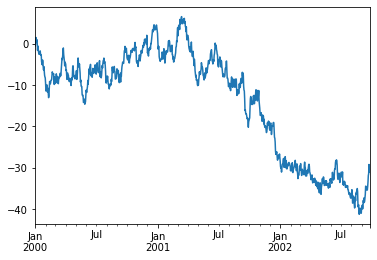

In [102]:
ts.plot()

On DataFrame, **`plot()`** is a convenience to plot all of the columns with labels:

In [103]:
df = pd.DataFrame(np.random.randn(1000, 4), index = ts.index, columns = ['A', 'B', 'C', 'D'])
df

,A,B,C,D
2000-01-01,1.287765,0.127924,1.189613,1.334709
2000-01-02,-0.253439,0.206719,0.554156,0.469192
2000-01-03,0.058797,1.175316,-0.323368,-0.041474
2000-01-04,-0.960367,1.953904,0.596169,0.570547
2000-01-05,0.912638,-0.766769,-1.032405,1.725390
...,...,...,...,...
2002-09-22,0.386975,-1.453719,-3.819601,-4.292885
2002-09-23,-0.035041,-0.080037,0.448961,0.936548
2002-09-24,0.812028,1.546625,0.950294,-0.845769
2002-09-25,-2.219187,-0.762493,0.730103,1.228276


In [104]:
df = df.cumsum()
df

,A,B,C,D
2000-01-01,1.287765,0.127924,1.189613,1.334709
2000-01-02,1.034326,0.334643,1.743769,1.803901
2000-01-03,1.093123,1.509959,1.420401,1.762427
2000-01-04,0.132756,3.463863,2.016570,2.332975
2000-01-05,1.045394,2.697094,0.984165,4.058364
...,...,...,...,...
2002-09-22,-23.252124,-18.912223,6.492469,47.076988
2002-09-23,-23.287165,-18.992260,6.941430,48.013536
2002-09-24,-22.475137,-17.445635,7.891723,47.167768
2002-09-25,-24.694323,-18.208128,8.621826,48.396044


<Figure size 432x288 with 0 Axes>

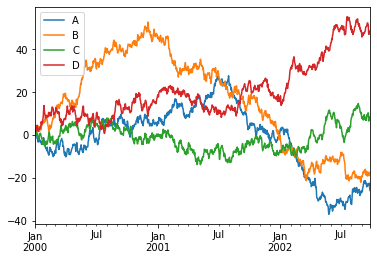

In [105]:
plt.figure();
df.plot();
plt.legend(loc = 'best')

## Getting Data In/Out
---
### CSV
[Writing to a csv file](https://pandas.pydata.org/pandas-docs/stable/io.html#io-store-in-csv "Writing to CSV format")

In [106]:
df.to_csv('foo.csv')

[Reading from a csv file](https://pandas.pydata.org/pandas-docs/stable/io.html#io-read-csv-table "Reading from a csv file")

In [107]:
pd.read_csv('foo.csv').head()

,Unnamed: 0,A,B,C,D
0,2000-01-01,1.287765,0.127924,1.189613,1.334709
1,2000-01-02,1.034326,0.334643,1.743769,1.803901
2,2000-01-03,1.093123,1.509959,1.420401,1.762427
3,2000-01-04,0.132756,3.463863,2.016570,2.332975
4,2000-01-05,1.045394,2.697094,0.984165,4.058364


### HDF5
Reading and writing to [HDFStores](https://pandas.pydata.org/pandas-docs/stable/io.html#io-hdf5 "HDF5 (PyTables)").

Writing to a HDF5 Store.

In [108]:
df.to_hdf('foo.h5', 'df')

### Hierarchical Data Format (HDF) 

  - a set of file formats (HDF4, HDF5) designed to store and organize large amounts of data. 
  - many HDF libraries and associated tools are available under a liberal, BSD-like license for general use
  - HDF5, the current version, simplifies the file structure to include only two major types of object:
    - Datasets: multidimensional arrays of a homogeneous type
    - Groups: container structures which can hold datasets and other groups

Reading from a HDF5 Store.

In [109]:
pd.read_hdf('foo.h5','df').head()

,A,B,C,D
2000-01-01,1.287765,0.127924,1.189613,1.334709
2000-01-02,1.034326,0.334643,1.743769,1.803901
2000-01-03,1.093123,1.509959,1.420401,1.762427
2000-01-04,0.132756,3.463863,2.016570,2.332975
2000-01-05,1.045394,2.697094,0.984165,4.058364


### Excel
Reading and writing to [MS Excel](https://pandas.pydata.org/pandas-docs/stable/io.html#io-excel "Excel files").

Writing to an excel file.

In [110]:
df.to_excel('foo.xlsx', sheet_name='Sheet1')

Reading from an excel file.

In [111]:
pd.read_excel('foo.xlsx', 'Sheet1', index_col=None, na_values=['NA']).head()

,Unnamed: 0,A,B,C,D
0,2000-01-01,1.287765,0.127924,1.189613,1.334709
1,2000-01-02,1.034326,0.334643,1.743769,1.803901
2,2000-01-03,1.093123,1.509959,1.420401,1.762427
3,2000-01-04,0.132756,3.463863,2.016570,2.332975
4,2000-01-05,1.045394,2.697094,0.984165,4.058364
